In [340]:
#importing important librarier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

In [341]:
#loading File
df=pd.read_csv("ablone.csv")

In [342]:
#Exploring Data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [343]:
df.shape

(4177, 9)

In [344]:
#the data has 4177 rows and 12 columns

In [345]:
#checking for null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

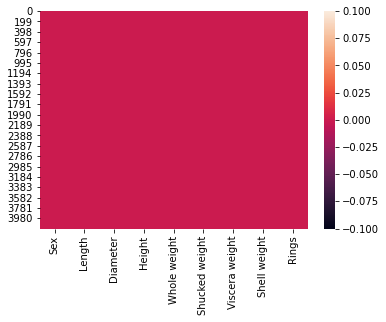

In [346]:
sns.heatmap(df.isnull())

In [347]:
#there is no null values in the data set

In [348]:
#checking unique values in the dependent data set since it is a classification problem
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [350]:
#here sex is an object varibale, rings is the int varible while rest are float type 

In [351]:
#

<AxesSubplot:xlabel='Rings', ylabel='count'>

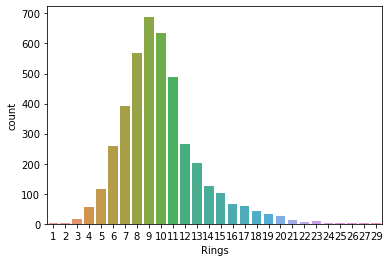

In [352]:
#EDA
#univariate analysis
#exploring the dependent variable
sns.countplot(data=df, x="Rings")

In [353]:
#

In [354]:
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [355]:
#mapping quality variable
quality_mapping={
    "M": 1,
    "F": 2,
    "I": 3
}

In [356]:
df.loc[:, "Sex"]=df.Sex.map(quality_mapping)

In [357]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [358]:
#the mean of length and diameter is less than the median hence the data is left skwed.
#Apart from Lenght, diameter and sex all data are right skewed

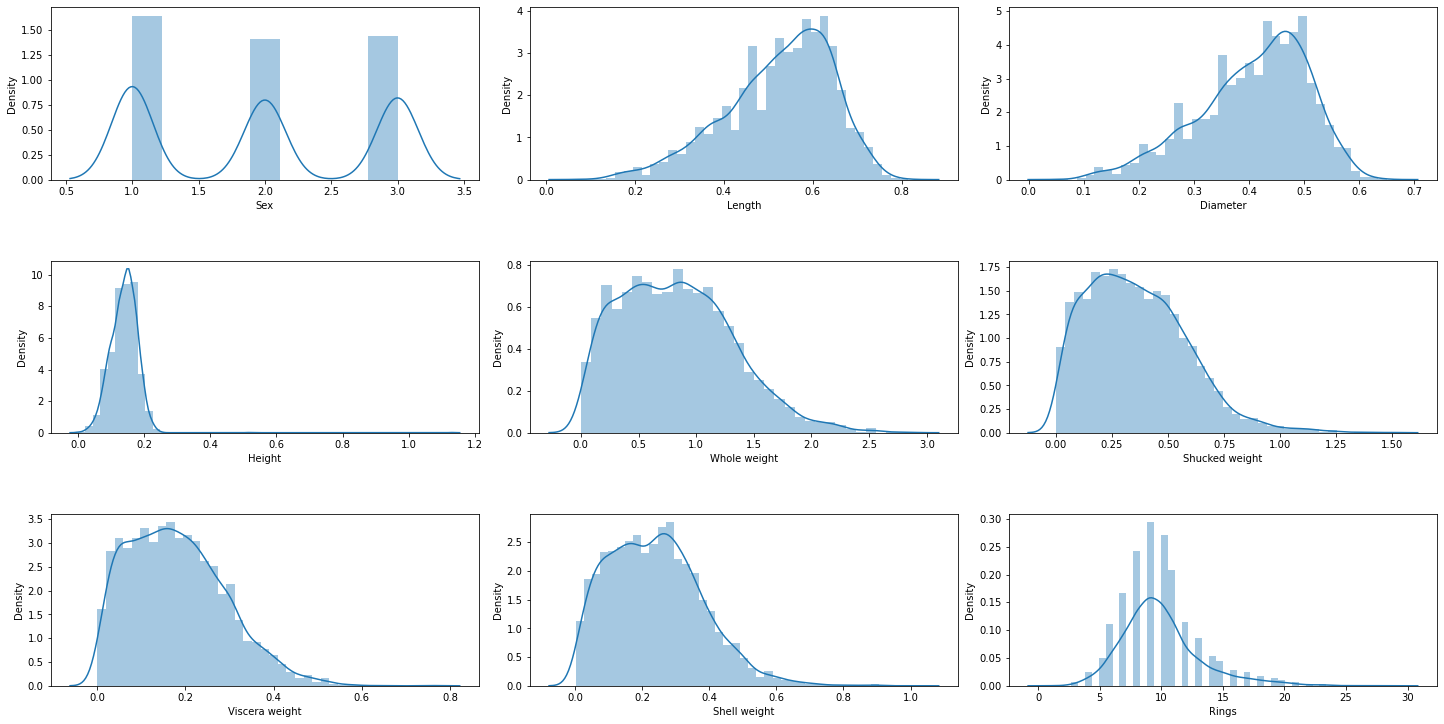

In [359]:
#ploting distplot
fig, ax=plt.subplots(ncols=3,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [360]:
# the sex grapgh is well balanced
#there is huge outliers in Height variable


<AxesSubplot:xlabel='Rings', ylabel='Sex'>

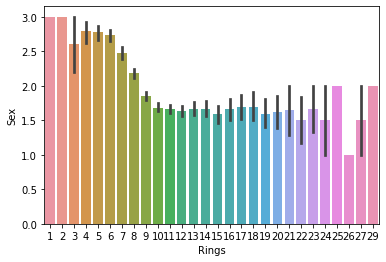

In [361]:
#Bivariate analysis
sns.barplot(x="Rings", y="Sex",data=df)

In [362]:
# this plot(Rings/Sex) shos that the less numbers of rings shows that teh abalone is an infent
#  the abalone with rings ~8-20 fall into female category 
#the abalone with rings 25 and 29 is a  female rest are males

<AxesSubplot:xlabel='Rings', ylabel='Length'>

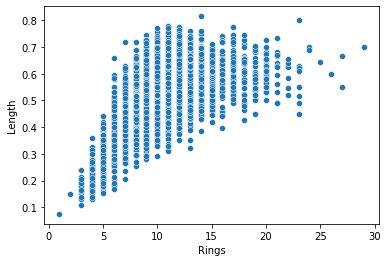

In [363]:
sns.scatterplot(data=df,x="Rings", y="Length")

In [364]:
#the length of the abalone increses with the Rings

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

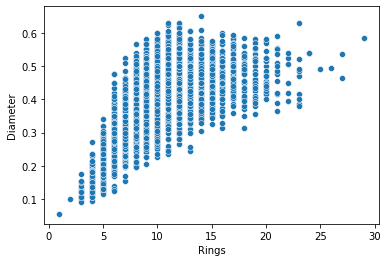

In [365]:
sns.scatterplot(data=df,x="Rings", y="Diameter")

In [366]:
#the Diameter of the abalone increses with the Rings

<AxesSubplot:xlabel='Rings', ylabel='Height'>

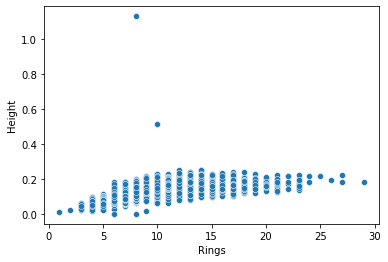

In [367]:
sns.scatterplot(data=df,x="Rings", y="Height")

In [368]:
#the Height of the Heights increses with the Rings
#there are  some outliers in the data

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

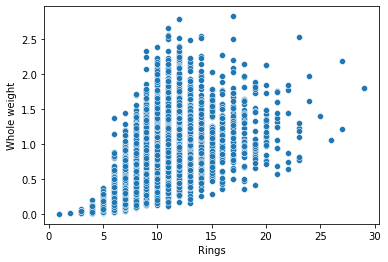

In [369]:
sns.scatterplot(data=df,x="Rings", y="Whole weight")

In [370]:
#the whole weight of the abalone is maximum between rings 10-20

<AxesSubplot:xlabel='Rings', ylabel='Shucked weight'>

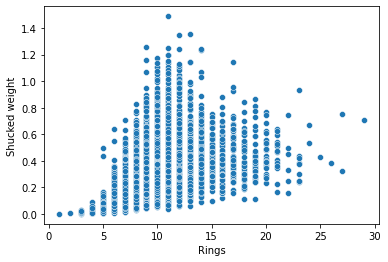

In [371]:
sns.scatterplot(data=df,x="Rings", y="Shucked weight")

In [372]:
#the shucked weight of abalone is maximum between 9-13 Rings

<AxesSubplot:xlabel='Rings', ylabel='Viscera weight'>

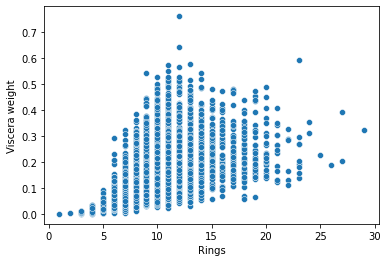

In [373]:
sns.scatterplot(data=df,x="Rings", y="Viscera weight")

In [374]:
#the viscera weight is maximum between 10-15

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

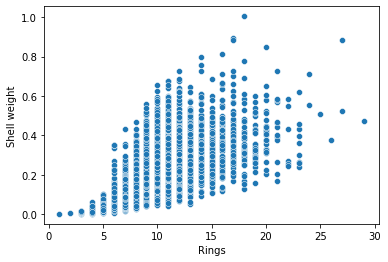

In [375]:
sns.scatterplot(data=df,x="Rings", y="Shell weight")

In [376]:
# the Shell weight increses with the Rings

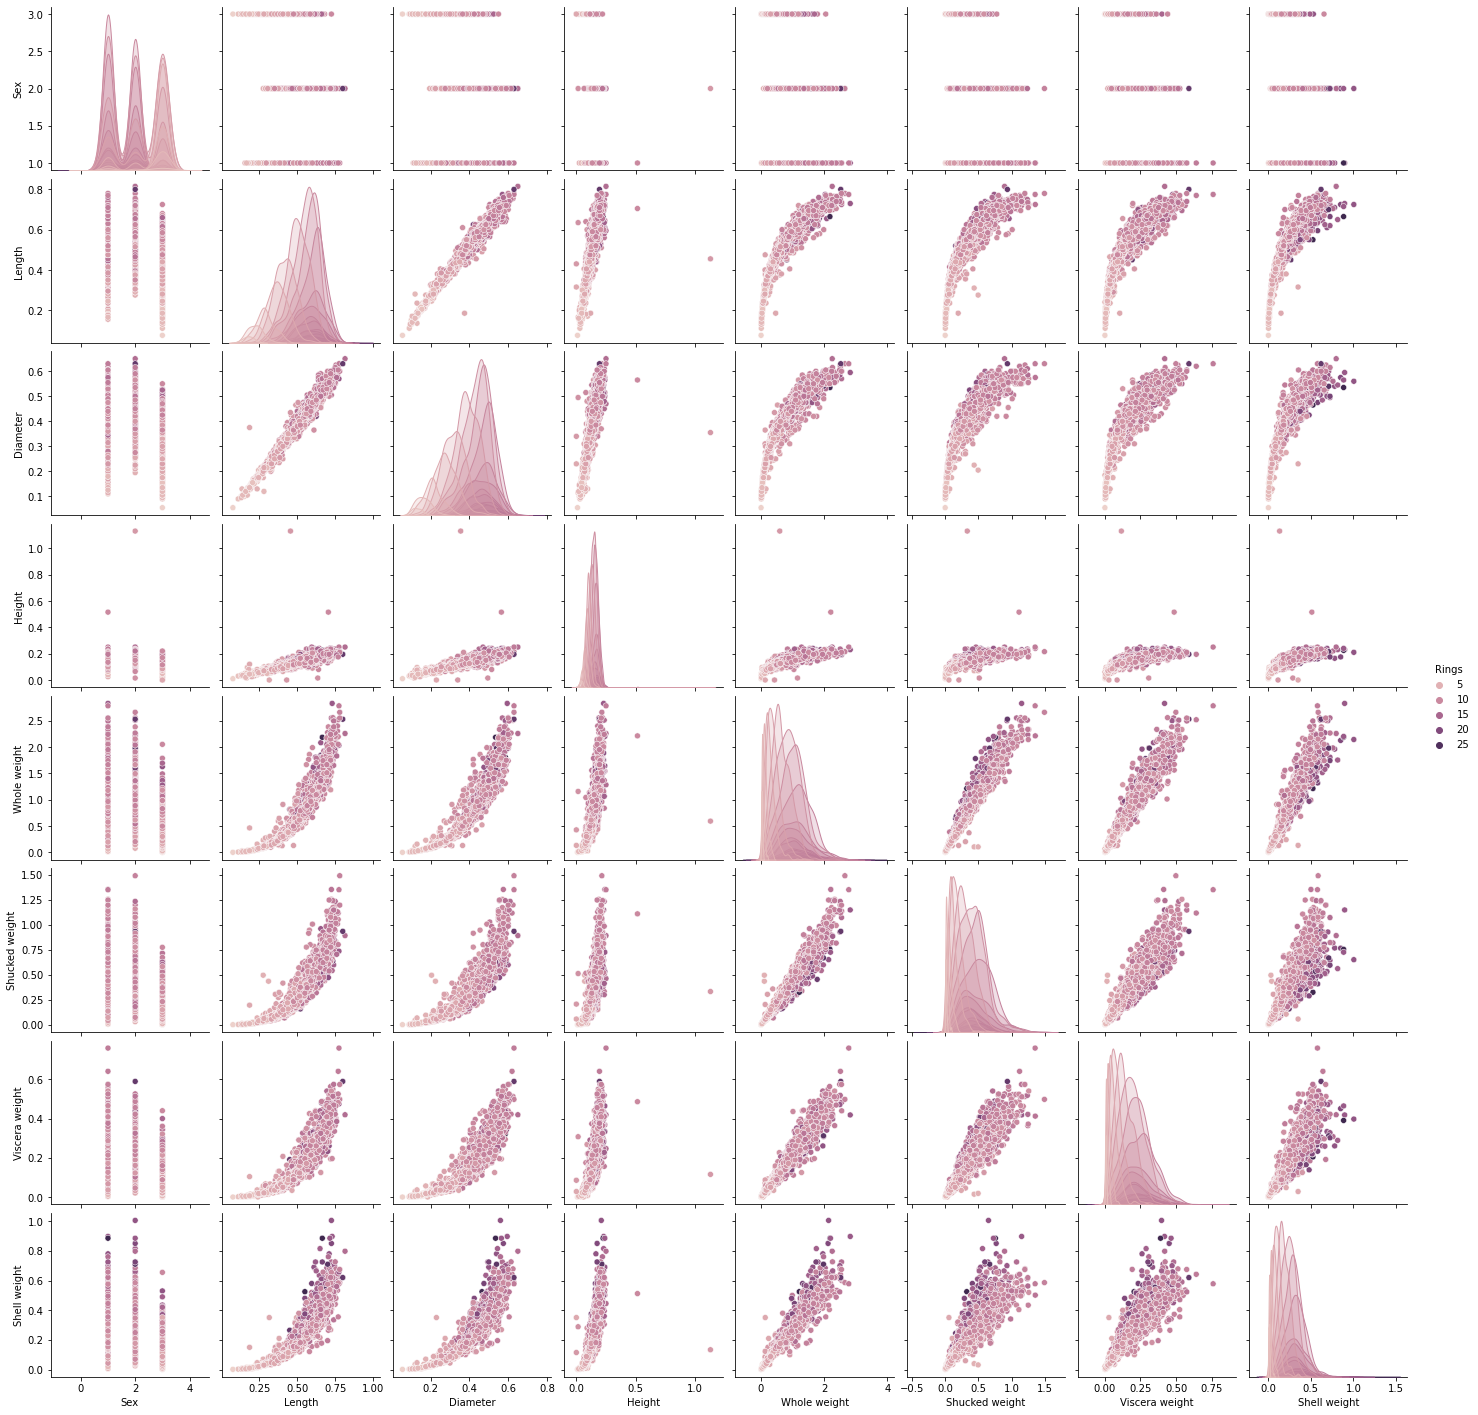

In [377]:
sns.pairplot(df, hue="Rings")

In [378]:
#using correlation fuction
cor=df.corr()

<AxesSubplot:>

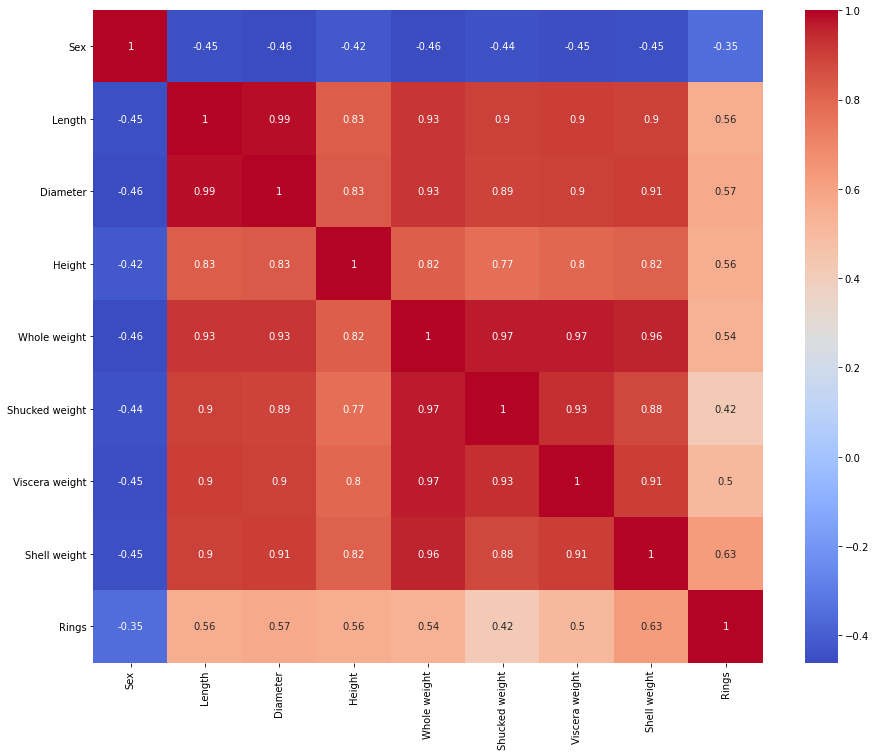

In [379]:
#using heatmap to show correlation
plt.figure(figsize=(15,12))
sns.heatmap(cor, annot=True, cmap="coolwarm")

In [380]:
#the Rings is positively correlated with all the variables 
#the sex is negatively correlated with all the variables
#apart from sex all variable are positively correlated with each other

In [381]:
#ploting boxplot to see outliers

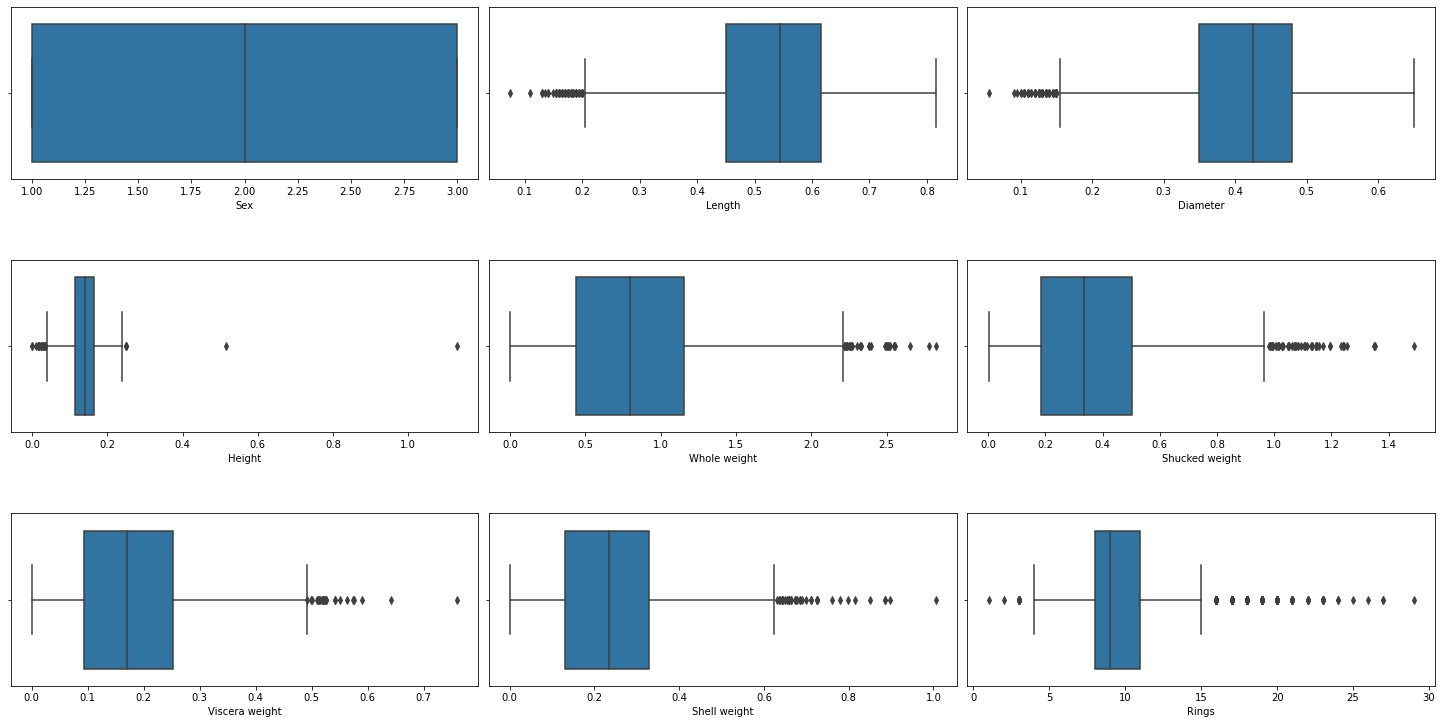

In [382]:
fig, ax=plt.subplots(ncols=3,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [383]:
# Apart from sex there are outliers in every columns

In [384]:
#there are outliers in every columns

In [385]:
from scipy.stats import zscore

In [386]:
z=np.abs(zscore(df))

In [387]:
df_new=df[(z<3).all(axis=1)]

In [388]:
df_new.shape ,df.shape

((4027, 9), (4177, 9))

In [389]:
#There is the loss of ~4 percent data

In [390]:
#spliting the data in x and y

In [391]:
x=df_new.drop("Rings", axis=1)

In [392]:
y=df_new["Rings"]

In [393]:
x.shape, y.shape

((4027, 8), (4027,))

In [394]:
y=y.values.reshape(-1,1)

In [395]:
y.shape

(4027, 1)

In [396]:
x.skew()

Sex               0.062158
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

In [397]:
#applying power transform
from sklearn.preprocessing import power_transform
df1=power_transform(x)
df1=pd.DataFrame(df1, columns=x.columns)
df1.skew()

Sex              -0.056625
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

In [398]:
x=df1

In [399]:
#balancing the data

<AxesSubplot:ylabel='count'>

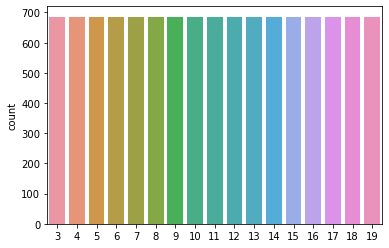

In [400]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)
sns.countplot(y)

In [401]:
#spliting the data in train test model 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=49)

In [402]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8163, 8), (3499, 8), (8163,), (3499,))

In [403]:
#creating function for the model and accuricy prediction
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [404]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           3       0.91      0.90      0.91       178
           4       0.82      0.78      0.80       195
           5       0.75      0.76      0.76       206
           6       0.57      0.55      0.56       202
           7       0.43      0.53      0.47       192
           8       0.35      0.28      0.31       221
           9       0.22      0.17      0.19       235
          10       0.22      0.26      0.24       196
          11       0.32      0.29      0.31       231
          12       0.47      0.49      0.48       194
          13       0.50      0.54      0.52       213
          14       0.63      0.64      0.63       211
          15       0.63      0.67      0.65       189
          16       0.70      0.72      0.71       216
          17       0.76      0.76      0.76       216
          18       0.73      0.78      0.75       198
          19       0.80      0.78      0.79   

In [405]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.6067616986205087


In [406]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           3       0.91      0.97      0.94       178
           4       0.86      0.85      0.85       195
           5       0.80      0.85      0.83       206
           6       0.71      0.69      0.70       202
           7       0.53      0.62      0.57       192
           8       0.45      0.43      0.44       221
           9       0.32      0.23      0.27       235
          10       0.32      0.29      0.30       196
          11       0.60      0.47      0.53       231
          12       0.71      0.69      0.70       194
          13       0.74      0.76      0.75       213
          14       0.83      0.87      0.85       211
          15       0.75      0.85      0.80       189
          16       0.83      0.92      0.87       216
          17       0.88      0.94      0.91       216
          18       0.88      0.93      0.90       198
          19       0.86      0.91      0.88   

In [407]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.7455903036380841


In [408]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           3       0.65      0.91      0.76       178
           4       0.50      0.41      0.45       195
           5       0.48      0.48      0.48       206
           6       0.39      0.42      0.40       202
           7       0.29      0.39      0.34       192
           8       0.30      0.34      0.32       221
           9       0.26      0.21      0.23       235
          10       0.18      0.13      0.15       196
          11       0.26      0.28      0.27       231
          12       0.17      0.10      0.12       194
          13       0.16      0.08      0.11       213
          14       0.17      0.13      0.15       211
          15       0.21      0.29      0.24       189
          16       0.41      0.19      0.25       216
          17       0.36      0.21      0.26       216
          18       0.24      0.41      0.30       198
          19       0.29      0.55      0.38   

In [409]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.3269610311887241


In [410]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           3       0.64      0.94      0.76       178
           4       0.42      0.46      0.44       195
           5       0.38      0.40      0.39       206
           6       0.34      0.36      0.35       202
           7       0.22      0.30      0.25       192
           8       0.14      0.29      0.19       221
           9       0.17      0.11      0.13       235
          10       0.00      0.00      0.00       196
          11       0.25      0.06      0.09       231
          12       0.00      0.00      0.00       194
          13       0.00      0.00      0.00       213
          14       0.15      0.04      0.06       211
          15       0.05      0.12      0.07       189
          16       0.40      0.01      0.02       216
          17       0.11      0.21      0.14       216
          18       0.31      0.08      0.12       198
          19       0.08      0.31      0.13   

In [411]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.21402911761224405


In [412]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           3       0.90      0.99      0.95       178
           4       0.84      0.88      0.86       195
           5       0.72      0.84      0.78       206
           6       0.59      0.62      0.60       202
           7       0.42      0.45      0.43       192
           8       0.37      0.30      0.33       221
           9       0.28      0.17      0.21       235
          10       0.25      0.15      0.19       196
          11       0.46      0.29      0.35       231
          12       0.49      0.55      0.52       194
          13       0.61      0.62      0.61       213
          14       0.73      0.80      0.77       211
          15       0.64      0.86      0.74       189
          16       0.76      0.82      0.79       216
          17       0.81      0.92      0.86       216
          18       0.78      0.87      0.83       198
          19       0.80      0.90      0.85   

In [413]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.6717584746853078


In [414]:
#ExtraTreeClassifier
model(ExtraTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           3       0.91      0.94      0.92       178
           4       0.79      0.78      0.79       195
           5       0.74      0.75      0.75       206
           6       0.56      0.53      0.55       202
           7       0.43      0.51      0.47       192
           8       0.33      0.27      0.30       221
           9       0.19      0.16      0.17       235
          10       0.20      0.19      0.19       196
          11       0.34      0.29      0.31       231
          12       0.45      0.47      0.46       194
          13       0.50      0.51      0.50       213
          14       0.59      0.56      0.58       211
          15       0.58      0.65      0.61       189
          16       0.68      0.72      0.70       216
          17       0.75      0.78      0.76       216
          18       0.65      0.71      0.67       198
          19       0.73      0.79      0.76   

In [415]:
print(cross_val_score(ExtraTreeClassifier(),x,y,cv=5).mean())

0.5919241342245167


In [416]:
#he best model is RandomTreeClassifier

In [417]:
#setting parameter for hypertuning
parameter={"max_depth":np.arange(2,10),
          "criterion":["gini","entropy"]
           } 

In [418]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [419]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [420]:
#checking best parameters
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [421]:
#building final model
b1=RandomForestClassifier(criterion="entropy", max_depth=9)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.7099171191769077


In [422]:
best_model=RandomForestClassifier()
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.7164904258359531


In [423]:
#the Hyperparameter tunning is giving less accuracy than default setting

In [424]:
#savingThemodel

In [425]:
import joblib
joblib.dump(best_model,"Abalone.pkl")

['Abalone.pkl']